<a href="https://colab.research.google.com/github/candobettercode/Machine-Learning/blob/main/Face_mask_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [1]:
#configure
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 156M/163M [00:00<00:00, 280MB/s]
100% 163M/163M [00:00<00:00, 256MB/s]


In [6]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Data is extracted..")

Data is extracted..


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir('/content/data/with_mask')

In [12]:
print(with_mask_files[0:5])

['with_mask_3410.jpg', 'with_mask_895.jpg', 'with_mask_1887.jpg', 'with_mask_2037.jpg', 'with_mask_2600.jpg']


In [13]:
print(with_mask_files[-5:])

['with_mask_2213.jpg', 'with_mask_2354.jpg', 'with_mask_2171.jpg', 'with_mask_1559.jpg', 'with_mask_929.jpg']


In [14]:
without_mask_files = os.listdir('/content/data/without_mask')

In [16]:
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_473.jpg', 'without_mask_1996.jpg', 'without_mask_2212.jpg', 'without_mask_2482.jpg', 'without_mask_2691.jpg']
['without_mask_2511.jpg', 'without_mask_842.jpg', 'without_mask_1385.jpg', 'without_mask_3336.jpg', 'without_mask_3520.jpg']


In [17]:
print("Number of masked images:", len(with_mask_files))
print("Number of without masked images:", len(without_mask_files))


Number of masked images: 3725
Number of without masked images: 3828


**Creating Lables for the two class of images**

with mask --> 1
without mask --> 0

In [18]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [19]:
print(with_mask_labels[0:5])

[1, 1, 1, 1, 1]


In [20]:
print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]


In [21]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [22]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


In [23]:
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

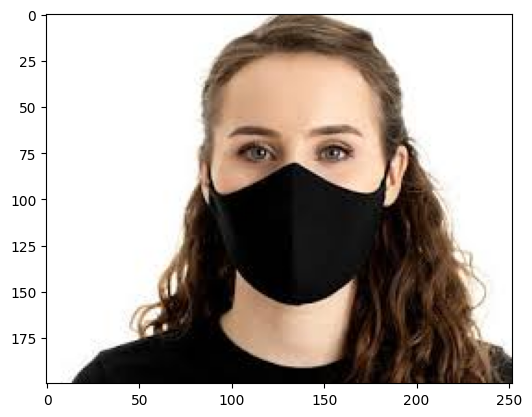

In [25]:
img = mpimg.imread('/content/data/with_mask/with_mask_2213.jpg')
imgplot = plt.imshow(img)

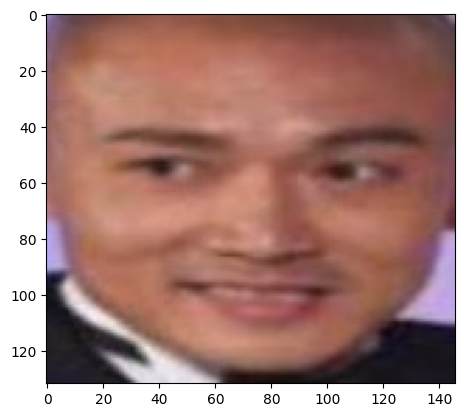

In [27]:
img = mpimg.imread('/content/data/without_mask/without_mask_473.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the images
2. convert the images in numpy array

In [41]:
with_mask_path = '/content/data/with_mask/'

data = []

In [42]:
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3725


array([[[225, 227, 239],
        [226, 228, 240],
        [226, 228, 240],
        ...,
        [149, 154, 157],
        [138, 143, 147],
        [133, 138, 142]],

       [[224, 226, 238],
        [224, 226, 238],
        [225, 227, 239],
        ...,
        [155, 160, 161],
        [143, 149, 150],
        [138, 144, 145]],

       [[224, 226, 239],
        [224, 226, 238],
        [223, 225, 237],
        ...,
        [120, 126, 125],
        [111, 117, 115],
        [107, 113, 111]],

       ...,

       [[126, 141, 147],
        [119, 135, 141],
        [124, 141, 146],
        ...,
        [133, 138, 135],
        [135, 139, 137],
        [132, 136, 134]],

       [[115, 130, 135],
        [115, 132, 136],
        [108, 127, 131],
        ...,
        [134, 138, 138],
        [135, 139, 141],
        [130, 134, 137]],

       [[123, 141, 145],
        [121, 139, 143],
        [117, 136, 140],
        ...,
        [133, 137, 138],
        [132, 136, 140],
        [129, 132, 136]]], dtype=uint8)
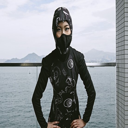

In [43]:
print(len(data))
data[0]

In [44]:
data[0:4]

[array([[[225, 227, 239],
         [226, 228, 240],
         [226, 228, 240],
         ...,
         [149, 154, 157],
         [138, 143, 147],
         [133, 138, 142]],
 
        [[224, 226, 238],
         [224, 226, 238],
         [225, 227, 239],
         ...,
         [155, 160, 161],
         [143, 149, 150],
         [138, 144, 145]],
 
        [[224, 226, 239],
         [224, 226, 238],
         [223, 225, 237],
         ...,
         [120, 126, 125],
         [111, 117, 115],
         [107, 113, 111]],
 
        ...,
 
        [[126, 141, 147],
         [119, 135, 141],
         [124, 141, 146],
         ...,
         [133, 138, 135],
         [135, 139, 137],
         [132, 136, 134]],
 
        [[115, 130, 135],
         [115, 132, 136],
         [108, 127, 131],
         ...,
         [134, 138, 138],
         [135, 139, 141],
         [130, 134, 137]],
 
        [[123, 141, 145],
         [121, 139, 143],
         [117, 136, 140],
         ...,
         [133, 137, 138],
  

In [45]:
without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [46]:
type(data)

list

In [47]:
len(data)

7553

array([[[225, 227, 239],
        [226, 228, 240],
        [226, 228, 240],
        ...,
        [149, 154, 157],
        [138, 143, 147],
        [133, 138, 142]],

       [[224, 226, 238],
        [224, 226, 238],
        [225, 227, 239],
        ...,
        [155, 160, 161],
        [143, 149, 150],
        [138, 144, 145]],

       [[224, 226, 239],
        [224, 226, 238],
        [223, 225, 237],
        ...,
        [120, 126, 125],
        [111, 117, 115],
        [107, 113, 111]],

       ...,

       [[126, 141, 147],
        [119, 135, 141],
        [124, 141, 146],
        ...,
        [133, 138, 135],
        [135, 139, 137],
        [132, 136, 134]],

       [[115, 130, 135],
        [115, 132, 136],
        [108, 127, 131],
        ...,
        [134, 138, 138],
        [135, 139, 141],
        [130, 134, 137]],

       [[123, 141, 145],
        [121, 139, 143],
        [117, 136, 140],
        ...,
        [133, 137, 138],
        [132, 136, 140],
        [129, 132, 136]]], dtype=uint8)
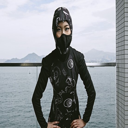

In [48]:
data[0]

In [49]:
type(data[0])

numpy.ndarray

In [50]:
data[0].shape

(128, 128, 3)

In [51]:
 X = np.array(data)
 y = np.array(labels)

In [52]:
type(X)

numpy.ndarray

In [53]:
type(y)

numpy.ndarray

In [56]:
print(X.shape)

(7553, 128, 128, 3)


In [55]:
print(y.shape)

(7553,)


In [57]:
print(y)

[1 1 1 ... 0 0 0]


**Train Test split**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [60]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


**Scaling data**

In [61]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [62]:
X_train_scaled.shape

(6042, 128, 128, 3)

array([[[ 19,  22,  37],
        [ 19,  22,  37],
        [ 18,  21,  37],
        ...,
        [ 42,  41,  55],
        [ 41,  40,  54],
        [ 41,  40,  54]],

       [[ 19,  22,  37],
        [ 19,  22,  37],
        [ 18,  21,  36],
        ...,
        [ 41,  40,  54],
        [ 40,  39,  53],
        [ 40,  39,  53]],

       [[ 19,  22,  38],
        [ 19,  22,  36],
        [ 17,  20,  33],
        ...,
        [ 38,  37,  51],
        [ 37,  36,  50],
        [ 37,  36,  50]],

       ...,

       [[ 41,  43,  68],
        [ 38,  40,  65],
        [ 29,  31,  56],
        ...,
        [131, 108, 101],
        [130, 107,  99],
        [130, 107,  99]],

       [[ 42,  44,  69],
        [ 36,  38,  63],
        [ 22,  24,  49],
        ...,
        [133, 109, 102],
        [131, 107, 100],
        [131, 107,  99]],

       [[ 43,  45,  70],
        [ 36,  38,  63],
        [ 19,  21,  46],
        ...,
        [134, 109, 102],
        [132, 107, 100],
        [132, 107, 100]]], dtype=uint8)
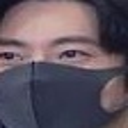

In [63]:
X_train[0]

In [65]:
X_train_scaled[0]

array([[[0.0745098 , 0.08627451, 0.14509804],
        [0.0745098 , 0.08627451, 0.14509804],
        [0.07058824, 0.08235294, 0.14509804],
        ...,
        [0.16470588, 0.16078431, 0.21568627],
        [0.16078431, 0.15686275, 0.21176471],
        [0.16078431, 0.15686275, 0.21176471]],

       [[0.0745098 , 0.08627451, 0.14509804],
        [0.0745098 , 0.08627451, 0.14509804],
        [0.07058824, 0.08235294, 0.14117647],
        ...,
        [0.16078431, 0.15686275, 0.21176471],
        [0.15686275, 0.15294118, 0.20784314],
        [0.15686275, 0.15294118, 0.20784314]],

       [[0.0745098 , 0.08627451, 0.14901961],
        [0.0745098 , 0.08627451, 0.14117647],
        [0.06666667, 0.07843137, 0.12941176],
        ...,
        [0.14901961, 0.14509804, 0.2       ],
        [0.14509804, 0.14117647, 0.19607843],
        [0.14509804, 0.14117647, 0.19607843]],

       ...,

       [[0.16078431, 0.16862745, 0.26666667],
        [0.14901961, 0.15686275, 0.25490196],
        [0.11372549, 0

**Building a Convolution Neural Network**

In [66]:
import tensorflow as tf
from tensorflow import keras

In [68]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation = 'relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation = 'sigmoid'))

**Compiling the neural Network**

In [69]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

**Training neural netwrok**

In [70]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 25ms/step - loss: 0.4476 - acc: 0.8067 - val_loss: 0.2933 - val_acc: 0.8760
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2993 - acc: 0.8816 - val_loss: 0.2509 - val_acc: 0.8860
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2521 - acc: 0.9007 - val_loss: 0.2560 - val_acc: 0.8992
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2090 - acc: 0.9161 - val_loss: 0.2026 - val_acc: 0.9074
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1786 - acc: 0.9261 - val_loss: 0.1794 - val_acc: 0.9223


**Model Evaluation**

In [74]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy =",accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.1849 - acc: 0.9272
Test Accuracy = 0.9272005558013916


In [75]:
h = history

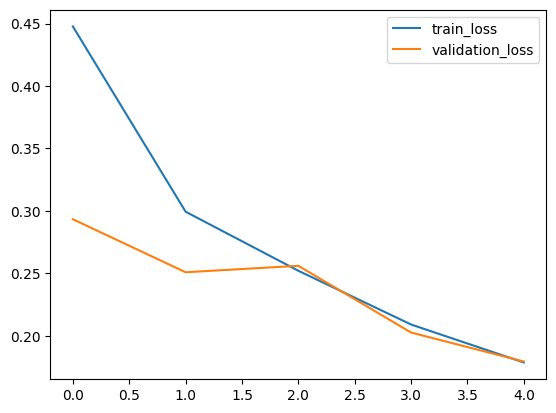

In [77]:
plt.plot(h.history['loss'], label= 'train_loss')
plt.plot(h.history['val_loss'], label= 'validation_loss')
plt.legend()
plt.show()

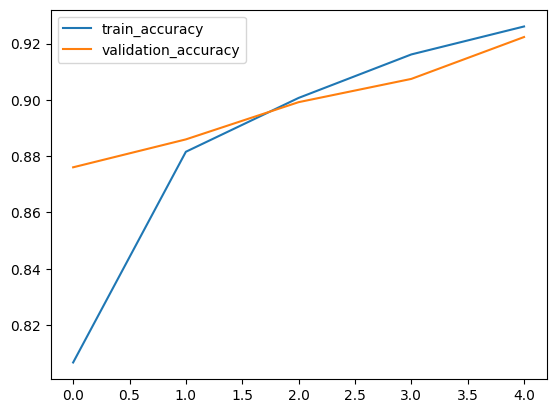

In [78]:
plt.plot(h.history['acc'], label= 'train_accuracy')
plt.plot(h.history['val_acc'], label= 'validation_accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted/content/unmasked.jpg


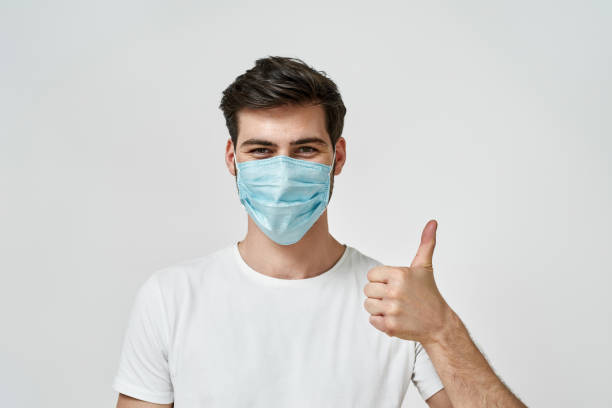

1/1 [==============================] - 0s 358ms/step
[[0.46867493 0.585539  ]]
1
The person in the image is wearing the mask


In [85]:
input_image_path = input("Path of the image to be predicted")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print("The person in the image is wearing the mask")
else:
  print("The person in the image is not wearing the mask")